<a href="https://colab.research.google.com/github/karhong9608/glowing-goggles/blob/master/FYP_MobileNetV2_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required libraries and depencies

In [ ]:
#pip install tensorflow
#!pip install tensorflow_hub
#!pip install h5py
#!pip install tensorboardcolab
#!pip install keras
#!pip install keras-preprocessing

%matplotlib inline
from __future__ import absolute_import, division, print_function, unicode_literals
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.optimizers import Adam, SGD, rmsprop

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import cv2
import os
import datetime
import tensorflow_hub as hub
import pandas as pd
import random

import tensorflow as tf
print(tf.__version__)

Using TensorFlow backend.


2.2.0-rc3


Mount your Google drive and select the path directory

In [ ]:
#mounting google drive
pd.set_option("display.precision", 8)
from google.colab import drive
drive.mount('/content/drive', force_remount=False)
data_path='/content/drive/My Drive/n_data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Determine the input images from path directory
Use image generator to shuffle the images into train and validation files
The images will split into desired value for each classes

In [ ]:
#input of image (train,valid)
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_path)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.2)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(TRAINING_DATA_DIR,subset="validation",shuffle=True,target_size=IMAGE_SHAPE)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(TRAINING_DATA_DIR,subset="training",shuffle=True,target_size=IMAGE_SHAPE)

/content/drive/My Drive/n_data
Found 199 images belonging to 4 classes.
Found 802 images belonging to 4 classes.


Determine the classes name from path directory

In [ ]:
#determine the classes
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)
num_classes = 4

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 4)
['0-Negative' '1-Small' '2-Medium' '3-Severe']


Mobilenet_v2 model architecture was used for the transfer learning

In [ ]:
#transfer learning MobileNetV2 model
model = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",output_shape=[1280],trainable=False),tf.keras.layers.Dropout(0.4),tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')])
model.build([None, 224,224,3])

In [ ]:
#summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
len(model.trainable_variables)

2

In [ ]:
#training model
model.compile(optimizer=tf.keras.optimizers.Nadam(lr=0.0001),loss='categorical_crossentropy',metrics=['acc'])
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit(train_generator,epochs=25,verbose=1,steps_per_epoch=steps_per_epoch,validation_data=valid_generator,validation_steps=val_steps_per_epoch).history

Epoch 1/25
26/26 [==============================] - 3s 132ms/step - loss: 1.7088 - acc: 0.2968 - val_loss: 1.1082 - val_acc: 0.4422
Epoch 2/25
26/26 [==============================] - 3s 110ms/step - loss: 1.4583 - acc: 0.3828 - val_loss: 0.9407 - val_acc: 0.6432
Epoch 3/25
26/26 [==============================] - 3s 109ms/step - loss: 1.2272 - acc: 0.4850 - val_loss: 0.8326 - val_acc: 0.6935
Epoch 4/25
26/26 [==============================] - 3s 108ms/step - loss: 1.0772 - acc: 0.5773 - val_loss: 0.7042 - val_acc: 0.7990
Epoch 5/25
26/26 [==============================] - 3s 109ms/step - loss: 0.9398 - acc: 0.5873 - val_loss: 0.6019 - val_acc: 0.8090
Epoch 6/25
26/26 [==============================] - 3s 110ms/step - loss: 0.8156 - acc: 0.6596 - val_loss: 0.6009 - val_acc: 0.7839
Epoch 7/25
26/26 [==============================] - 3s 107ms/step - loss: 0.7869 - acc: 0.6796 - val_loss: 0.5545 - val_acc: 0.8040
Epoch 8/25
26/26 [==============================] - 3s 111ms/step - loss: 0.

In [ ]:
#Save the model
model.save_weights('/content/drive/My Drive/keras_model/mob_weights.h5')
model.save('/content/drive/My Drive/keras_model/mob.h5')

print(model.save)

<bound method Network.save of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f548a026cc0>>


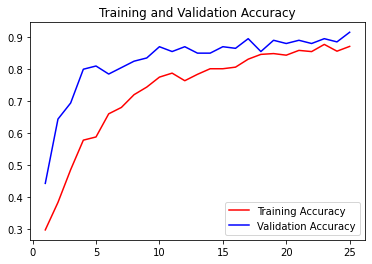

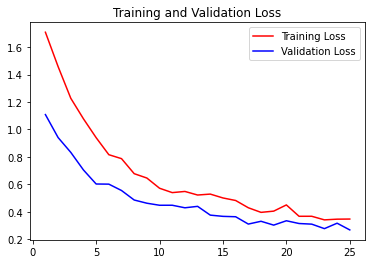

In [ ]:
#plot the train & val graph
acc = hist['acc']
val_acc = hist['val_acc']
loss = hist['loss']
val_loss = hist['val_loss']

epochs = range(1, len(acc) + 1)

# Visualize History for Accuracy.
plt.title('Training and Validation Accuracy')
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.legend()

plt.figure()
# Visualize History for Loss.
plt.title('Training and Validation Loss')
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend()

plt.show()

In [ ]:
print(hist)

{'loss': [1.708835482597351, 1.458292007446289, 1.2272436618804932, 1.0772418975830078, 0.939803421497345, 0.8156443238258362, 0.7868707180023193, 0.6771974563598633, 0.6453894972801208, 0.5709341764450073, 0.5391002893447876, 0.5475814938545227, 0.5215116143226624, 0.5282840132713318, 0.500106692314148, 0.4816107749938965, 0.42858216166496277, 0.39506229758262634, 0.4039517641067505, 0.449269562959671, 0.3664305508136749, 0.36651480197906494, 0.3402460813522339, 0.3453572690486908, 0.34630632400512695], 'acc': [0.29675811529159546, 0.38279300928115845, 0.4850374162197113, 0.5773067474365234, 0.5872818231582642, 0.6596009731292725, 0.6795511245727539, 0.719451367855072, 0.7431421279907227, 0.7743142247200012, 0.7867830395698547, 0.7630922794342041, 0.7830423712730408, 0.8004987239837646, 0.8004987239837646, 0.805486261844635, 0.8304239511489868, 0.8453865051269531, 0.8478803038597107, 0.8428927659988403, 0.8578553795814514, 0.8541147112846375, 0.8765586018562317, 0.8553615808486938, 0.

In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
tf_model_predictions = model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,0-Negative,1-Small,2-Medium,3-Severe
0,0.96559060,0.01760472,0.00992973,0.00687488
1,0.00315628,0.00236638,0.08766122,0.90681612
2,0.00024631,0.00448537,0.98657763,0.00869070
3,0.01001810,0.00822732,0.37504196,0.60671258
4,0.00428435,0.00089147,0.09474391,0.90008032


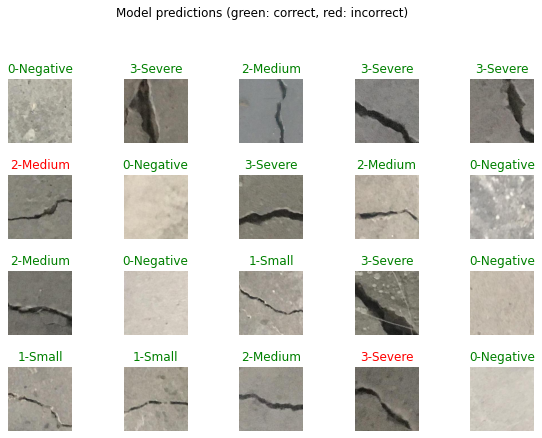

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
for n in range(20):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green"if predicted_ids[n] == true_label_ids[n]else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

Import dependencies for confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix 

Manual insert the actual and predicted value from above

In [ ]:
y_true = ['0-Negative', '3-Severe', '2-Medium', '3-Severe', '3-Severe', '1-Small', '0-Negative', '3-Severe', '2-Medium', '0-Negative', '2-Medium', '0-Negative', '1-Small', '3-Severe', '0-Negative', '1-Small', '1-Small', '2-Medium', '0-Negative']
y_pred = ['0-Negative', '3-Severe', '2-Medium', '3-Severe', '3-Severe', '2-Medium', '0-Negative', '3-Severe', '2-Medium', '0-Negative', '2-Medium', '0-Negative', '1-Small', '3-Severe', '0-Negative', '1-Small', '1-Small', '3-Severe', '0-Negative']

classes=['0-Negative', '1-Small', '2-Medium', '3-Severe']

confusion_matrix(y_true, y_pred, labels=['0-Negative', '1-Small', '2-Medium', '3-Severe'])

array([[6, 0, 0, 0],
       [0, 3, 1, 0],
       [0, 0, 3, 1],
       [0, 0, 0, 5]])

Define function for Confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Determine the array of Confusion matrix 

In [ ]:
cnf_matrix = confusion_matrix(y_true, y_pred,labels=['0-Negative', '1-Small', '2-Medium', '3-Severe'])
np.set_printoptions(precision=2)

PLot the confusion matrix

Confusion matrix, without normalization
[[6 0 0 0]
 [0 3 1 0]
 [0 0 3 1]
 [0 0 0 5]]


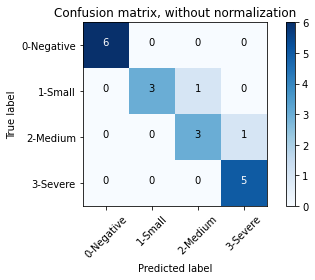

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0-Negative', '1-Small', '2-Medium', '3-Severe'],
                      title='Confusion matrix, without normalization')

List out the value of True Positive(TP), True Negative(TN), False Positive(FP) and False Negative(FN) from Confusion matrix

Determine the TP,TN,FP and FN as follow:
*   TP is the true value selected of class, overlapping of column and row
*   TN is the sum (other classes by overlapping column and row)

*   FP is column of sum (other in selected class) vertical
*   FN is row of sum (other in selected class) horizontal


---



Determine the Accuracy for each classes by using formula:

*   (TP + TN) / (TP + TN + FP + FN)









In [ ]:
#class 0-Negative
TP_0 = 6
TN_0 = 11
FP_0 = 0
FN_0 = 0

#Data will store inside an array
results_0 = {}

#accuracy for class 0-Negative
metric = "Accuracy for class 0-Negative"
results_0[metric] = (TP_0 + TN_0) / (TP_0 + TN_0 + FP_0 + FN_0)
print(f"{metric} is {results_0[metric]: .3f}")

Accuracy for class 0-Negative is  1.000


In [ ]:
#class 1-Small
TP_1 = 3
TN_1 = 13
FP_1 = 0
FN_1 = 1

#Data will store inside an array
results_1 = {}

#accuracy for class 1-Small
metric = "Accuracy for class 1-Small"
results_1[metric] = (TP_1 + TN_1) / (TP_1 + TN_1 + FP_1 + FN_1)
print(f"{metric} is {results_1[metric]: .3f}")

Accuracy for class 1-Small is  0.941


In [ ]:
#class 2-Medium
TP_2 = 3
TN_2 = 14
FP_2 = 1
FN_2 = 1

#Data will store inside an array
results_2 = {}

#accuracy for class 2-Medium
metric = "Accuracy for class 2-Medium"
results_2[metric] = (TP_2 + TN_2) / (TP_2 + TN_2 + FP_2 + FN_2)
print(f"{metric} is {results_2[metric]: .3f}")

Accuracy for class 2-Medium is  0.895


In [ ]:
#class 3-Severe
TP_3 = 5
TN_3 = 12
FP_3 = 1
FN_3 = 0

#Data will store inside an array
results_3 = {}

#accuracy for class 3-Severe
metric = "Accuracy for class 3-Severe"
results_3[metric] = (TP_3 + TN_3) / (TP_3 + TN_3 + FP_3 + FN_3)
print(f"{metric} is {results_3[metric]: .3f}")

Accuracy for class 3-Severe is  0.944
